In [ ]:
!pip install vosk
!git clone https://github.com/alphacep/vosk-api

Cloning into 'vosk-api'...
remote: Enumerating objects: 4211, done.
remote: Counting objects: 100% (1038/1038), done.
remote: Compressing objects: 100% (441/441), done.
remote: Total 4211 (delta 683), reused 808 (delta 555), pack-reused 3173
Receiving objects: 100% (4211/4211), 14.10 MiB | 24.18 MiB/s, done.
Resolving deltas: 100% (2337/2337), done.


In [ ]:
%cd vosk-api/python/example
#Russian lang model
!wget https://alphacephei.com/vosk/models/vosk-model-small-ru-0.22.zip
!unzip vosk-model-small-ru-0.22.zip
%mv vosk-model-small-ru-0.22 model
!rm -rf vosk-model-small-ru-0.22.zip

/content/vosk-api/python/example/vosk-api/python/example
--2024-05-18 12:59:38--  https://alphacephei.com/vosk/models/vosk-model-small-ru-0.22.zip
Resolving alphacephei.com (alphacephei.com)... 188.40.21.16, 2a01:4f8:13a:279f::2
Connecting to alphacephei.com (alphacephei.com)|188.40.21.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46236750 (44M) [application/zip]
Saving to: ‘vosk-model-small-ru-0.22.zip’

vosk-model-small-ru 100%[===================>]  44.09M  22.2MB/s    in 2.0s    

2024-05-18 12:59:41 (22.2 MB/s) - ‘vosk-model-small-ru-0.22.zip’ saved [46236750/46236750]

Archive:  vosk-model-small-ru-0.22.zip
   creating: vosk-model-small-ru-0.22/
   creating: vosk-model-small-ru-0.22/graph/
   creating: vosk-model-small-ru-0.22/graph/phones/
  inflating: vosk-model-small-ru-0.22/graph/phones/word_boundary.int  
  inflating: vosk-model-small-ru-0.22/graph/Gr.fst  
  inflating: vosk-model-small-ru-0.22/graph/HCLr.fst  
  inflating: vosk-model-small-ru-

In [ ]:
!pwd

/content/vosk-api/python/example/vosk-api/python/example


In [ ]:
urltext ='https://www.youtube.com/watch?v=qKioph_9WNk' # Russian YouTube Clip with no captions

youtube video_id: qKioph_9WNk


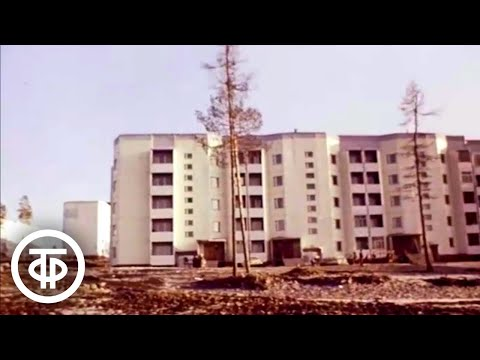

In [ ]:
from urllib.parse import urlparse, parse_qs

args = [urltext]
video_id = ''


def extract_video_id(url):
    query = urlparse(url)
    if query.hostname == 'youtu.be': return query.path[1:]
    if query.hostname in {'www.youtube.com', 'youtube.com'}:
        if query.path == '/watch': return parse_qs(query.query)['v'][0]
        if query.path[:7] == '/embed/': return query.path.split('/')[2]
        if query.path[:3] == '/v/': return query.path.split('/')[2]
    # fail?
    return None

for url in args:
    video_id = (extract_video_id(url))
    print('youtube video_id:',video_id)

from IPython.display import YouTubeVideo

YouTubeVideo(video_id)

In [ ]:
video_id

'qKioph_9WNk'

In [ ]:
!rm -rf e*.wav
!pip install -q yt-dlp
!yt-dlp --extract-audio --verbose --audio-format wav --output "extract.%(ext)s" {urltext}


[debug] Command-line config: ['--extract-audio', '--verbose', '--audio-format', 'wav', '--output', 'extract.%(ext)s', 'https://www.youtube.com/watch?v=qKioph_9WNk']
[debug] Encodings: locale UTF-8, fs utf-8, pref UTF-8, out utf-8, error utf-8, screen utf-8
[debug] yt-dlp version stable@2024.04.09 from yt-dlp/yt-dlp [ff0779267] (pip)
[debug] Python 3.10.12 (CPython x86_64 64bit) - Linux-6.1.85+-x86_64-with-glibc2.35 (OpenSSL 3.0.2 15 Mar 2022, glibc 2.35)
[debug] exe versions: ffmpeg 4.4.2 (setts), ffprobe 4.4.2
[debug] Optional libraries: Cryptodome-3.20.0, brotli-1.1.0, certifi-2024.02.02, mutagen-1.47.0, requests-2.31.0, secretstorage-3.3.1, sqlite3-3.37.2, urllib3-2.0.7, websockets-12.0
[debug] Proxy map: {'colab_language_server': '/usr/colab/bin/language_service'}
[debug] Request Handlers: urllib, requests, websockets
[debug] Loaded 1810 extractors
[youtube] Extracting URL: https://www.youtube.com/watch?v=qKioph_9WNk
[youtube] qKioph_9WNk: Downloading webpage
[youtube] qKioph_9WNk:

In [ ]:
!apt install ffmpeg

!ffmpeg -i extract.wav -vn -acodec pcm_s16le -ac 1 -ar 16000 -f wav test1.wav

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq -

In [ ]:
from vosk import Model, KaldiRecognizer, SetLogLevel
import sys
import os
import wave
import json

path = '/content/vosk-api/python/example/'

SetLogLevel(0)

if not os.path.exists("model"):
    print ("Please download the model from https://alphacephei.com/vosk/models and unpack as 'model' in the current folder.")
    exit (1)

#wf = wave.open(path+'/test.wav',"rb")#English test sample
wf = wave.open(path+'/test1.wav',"rb")#Chinese lang test sample
sound = path+'/test1.wav'
if wf.getnchannels() != 1 or wf.getsampwidth() != 2 or wf.getcomptype() != "NONE":
    print ("Audio file must be WAV format mono PCM.")
    exit (1)

model = Model("model")
rec = KaldiRecognizer(model, wf.getframerate())

while True:
    data = wf.readframes(4000)
    if len(data) == 0:
        break
    if rec.AcceptWaveform(data):
        continue
        #print(rec.Result())
       ## res = json.loads(rec.Result())
        #print(res['text'])
    #else:
        #print(rec.PartialResult())

original_stdout = sys.stdout
with open('vosk.json','w') as f:
    sys.stdout = f
    print(rec.FinalResult())
    f.close()
    sys.stdout = original_stdout
##res = json.loads(rec.FinalResult())
##print(res['text'])

In [ ]:
import json
import pandas as pd
import datetime
import copy

def fmttime(sec):
    secs = sec #millisecs / 1000.0
    d = datetime.timedelta(seconds=secs)
    t = (datetime.datetime.min + d).time()
    milli = t.strftime('%f')[:3]
    value = t.strftime('%H:%M:%S,') + milli
    return value


# Load JSON data
with open('vosk.json', 'r') as f:
    data = json.load(f)

# Retrieve the text
text = data['text']

# Split the text into lines of 100 characters
lines = [text[i:i+100] for i in range(0, len(text), 100)]

# Print each line
for line in lines:
    print(line)

нерюнгри индустриальной первенец байкал амурской магистрали трамплин к освоению природных кладовых ю
жной якутии так говорят учёные экономисты хозяйстве это город куда контейнеров с домашними вещами пр
ебывает сегодня в шесть раз больше чем отправляется отсюда утверждают статистики у него сто тысяч ли
ц и каждый пятый житель родился уже здесь хотя нерюнгри по возрасту сам ещё подросток трудно предста
вить что тех первых встретили тишина да безлюдные сопки был среди них и кузбасский горняк валентин к
арлович вин шум я проехался зарезать это да нет шесть поработать для так как из кого-то кто соответс
твовали жили палатки двадцати местные палатках ли печки очень тепло было в палатки было тепло на ули
цы большие сейчас джерико доску речки курильщики всегда холодея мы жили дружно из кузбасса приехал и
 строитель юрий константинович долгушин человек смелых неординарных решений он возглавил управления 
номер тринадцать комбината якутск угле строй не повезло по приезду меня назначили начальник